# Stable Diffusion 🎨

**This notebook requires an NVIDIA GPU.** Stable Diffusion is a text-to-image latent diffusion model created by the researchers and engineers from [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/), and [LAION](https://laion.ai/). It's trained on 512x512 images from a subset of the [LAION-5B](https://laion.ai/blog/laion-5b/) database. This model uses a frozen CLIP ViT-L/14 text encoder to condition the model on text prompts. With its 860M UNet and 123M text encoder, the model is relatively lightweight and runs on a GPU with at least 10GB VRAM.

In [1]:
import torch

if torch.cuda.device_count() >= 1:
    print(f"You're all set! GPU detected: {torch.cuda.get_device_name(0)}")
else:
    print("ERROR: No GPU detected. This notebook requires an NVIDIA GPU.")

You're all set! GPU detected: Tesla V100-PCIE-16GB


## Getting Started

Follow these steps to download the pre-trained stable diffusion model from Hugging Face:

1. [Create a Hugging Face account](https://huggingface.co/join) if you don't have one already
2. Visit https://huggingface.co/CompVis/stable-diffusion-v1-4 and agree to Hugging Face's conditions to access the model
3. Sign in to your Hugging Face account and [generate a token](https://huggingface.co/docs/hub/security-tokens#user-access-tokens)
4. Run the next cell to sign into Hugging Face with your token

Pro tip: [Create and set a `HUGGING_FACE_TOKEN` secret](https://docs.github.com/en/codespaces/managing-your-codespaces/managing-encrypted-secrets-for-your-codespaces) within your Codespaces settings to skip this login screen.

In [2]:
from huggingface_hub import HfFolder, notebook_login
from os import environ

token = environ.get("HUGGING_FACE_TOKEN")
if token != None:
    HfFolder.save_token(token)
else:
    notebook_login()

In [7]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", use_auth_token=True)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

In [4]:
device="cuda"
pipe = pipe.to(device)

## Create New Art

Update `prompt` and run the following cells to create original art. You can run these cells as many times as you'd like. Each run generates an original image!

In [5]:
prompt = "a photograph of an astronaut riding a horse"

0it [00:00, ?it/s]

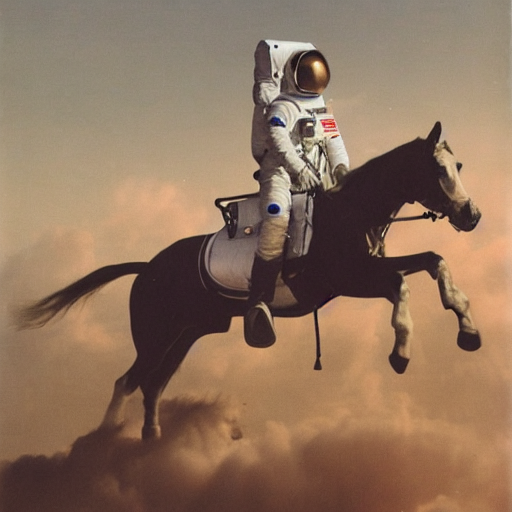

In [6]:
from torch import autocast

with autocast(device):
  image = pipe(prompt)["sample"][0]
image